In [1]:
#Step:1 Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures# for polynomial features

In [2]:
#Step:2 Defining the Data Set (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75]) 

In [3]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [4]:
# ** Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [5]:
model=LinearRegression()

In [6]:
model.fit(X_poly,Y)

LinearRegression()

In [7]:
#Step:5 Finding slope and intercept
m=model.coef_[0]
c=model.intercept_
print("Coefficient (Slope):",model.coef_[0])
print("Intercept",model.intercept_)

Coefficient (Slope): 0.0
Intercept 25.834848216909297


In [8]:
#Step:6 Equation of Line(Y=mx+c)
# print(f" Y= {m}X+{c}")
print(f"Equation of Line:Y={m:.2f}X+{c:.2f}")

Equation of Line:Y=0.00X+25.83


In [9]:
#Step:7 Prediction of model
Y_pred=model.predict(X_poly)# Predict Salaries for Experience

In [10]:
# Model evaluation metrics
# MSE
mse=mean_squared_error(Y, Y_pred)
print(f"Mean squared error:{mse:,.2f}")

Mean squared error:11.47


In [11]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean absolute error:{mae:.2f}")

Mean absolute error:2.98


In [12]:
# rmse=root_mean_squared_error(Y,Y_pred) (measures SD of residuals)
# print(f"Root mean squared error:{rmse:.2f}")
# #
rmse=np.sqrt(mse)
print(f"Root mean squared error:{rmse:.2f}")

Root mean squared error:3.39


In [13]:
#Accuracy
# R square and Adjusted R square are used to calculate accuracy
#R-sq represents how well the model fits the data (0 to 1 and 1 is best)
r2=r2_score(Y,Y_pred)
print(f"R squared:{r2:.2f}")

R squared:0.95


In [14]:
#Adjusted R-Squared for number of predictors ,better for multiple regression
n=len(Y)# No of obs
p=1 # No of independent Variables
adj_r2= 1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-square: {adj_r2:.2f}")

Adjusted R-square: 0.94


In [15]:
#**. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        01:33:44   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


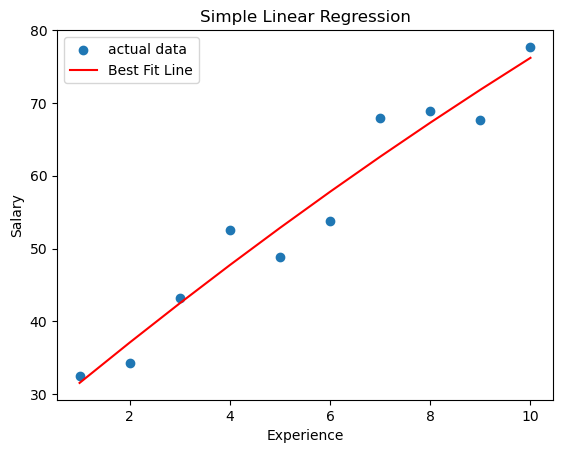

In [16]:
#Step:8 Visualization

#Plot actual data points
plt.scatter(X,Y,label="actual data")

# Plot the Regression line 
plt.plot(X,Y_pred,color="red",label="Best Fit Line")

# Add labels and legend
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()

# Display Graph
plt.show()

In [17]:
# Step 9: Prediction Feature with Polynomial Regression
while True:
    try:
        # Get input experience value
        exp = float(input("Enter the Experience to predict the Salary and -1 to exit: "))
        
        # Exit condition
        if exp <= -1:
            break
        
        # Transform the input experience using PolynomialFeatures (to include higher-degree terms)
        exp_poly = poly.transform(np.array([[exp]]))
        
        # Predict the salary using the polynomial regression model
        predicted_salary = model.predict(exp_poly)[0]
        
        # Print the predicted salary (formatted to 2 decimal places)
        print(f"Predicted Salary for {exp} years of experience is ${predicted_salary:.2f}K")
    
    except ValueError:
        # In case of invalid input, ask the user to try again
        print("Please try again with a valid number.")


Enter the Experience to predict the Salary and -1 to exit: 0
Predicted Salary for 0.0 years of experience is $25.83K
Enter the Experience to predict the Salary and -1 to exit: -3
